# Simple Linear regression

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sns
from pandas import Series, DataFrame

In [236]:
%matplotlib inline
rcParams ['figure.figsize'] = 10,8
sns.set_style('whitegrid')

/home/micheal/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [237]:
# Rooms variables
rooms = 2 * np.random.randn(100,1)+3

rooms[0:10]

array([[ 6.5163],
       [-0.4249],
       [ 2.4271],
       [ 3.7999],
       [ 0.965 ],
       [ 2.9326],
       [ 4.2195],
       [ 1.2215],
       [ 5.2775],
       [ 1.3362]])

In [238]:
# Price variables
price = 265 + 6 * rooms + abs(np.random.randn(100,1))

price[0:10]

array([[304.9679],
       [263.1999],
       [280.8237],
       [288.1521],
       [271.0574],
       [282.9168],
       [290.9517],
       [272.6525],
       [296.958 ],
       [273.4107]])

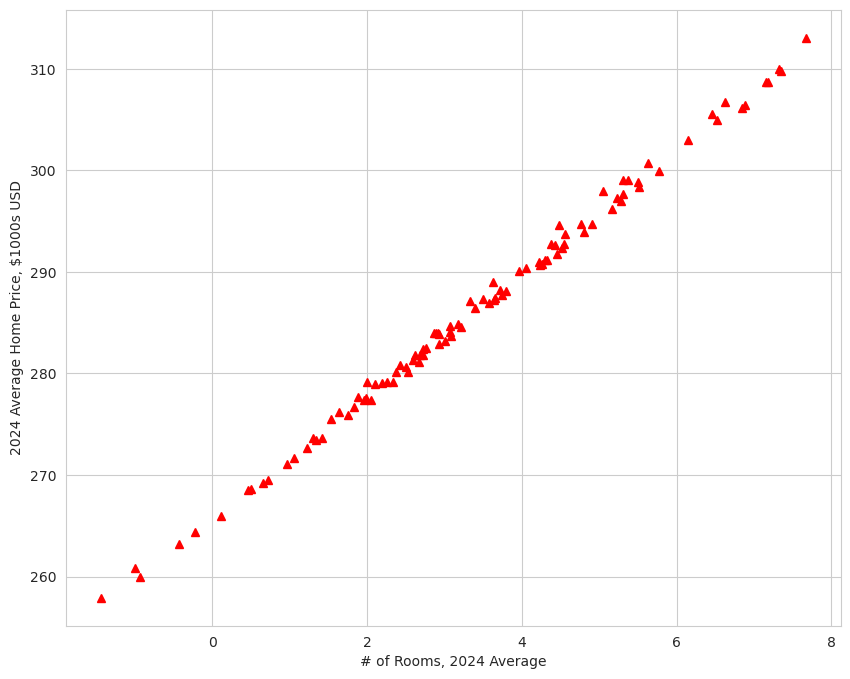

In [239]:
# scatterplot
plt.plot (rooms,price, 'r^') # r^ is specify point plot should be generate instead of defulte line plot
plt.xlabel ('# of Rooms, 2024 Average')
plt.ylabel ('2024 Average Home Price, $1000s USD')

plt.show()

 As the number of rooms increase the price oh the homes increase

In [240]:
X = rooms
y = price

LinReg = LinearRegression()
# fit model to data
LinReg.fit(X, y)

# In order to evaluate how well this model perfoms, we need the intercept and the coefficient
print (LinReg.intercept_, LinReg.coef_)

[265.733] [[6.0358]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.63

*Estimated Coefficients*
- LinReg.coef_ = [6.05] Estimated coefficients for the terms in the linear regression problem.

In [241]:
print (LinReg.score(X, y))

# score function returns the coefficient of determination which is our score of prediction


0.9972174197105403


it shows our model perfomes very well and R squared value is close to 1

# Multiple linear regression

In [242]:
# import the Counter class from the collections module, which will be used for counting the occurrence of elements in a dataset, facilitating frequency analysis.

from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [243]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/enrollment_forecast.csv'

enroll_df = pd.read_csv (address)

enroll_df.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']

enroll_df.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


According to assumptions of linear model, our variables all need to be continuous numeric variables

we also need to make sure that there's a linear relationship between predictors and predicted

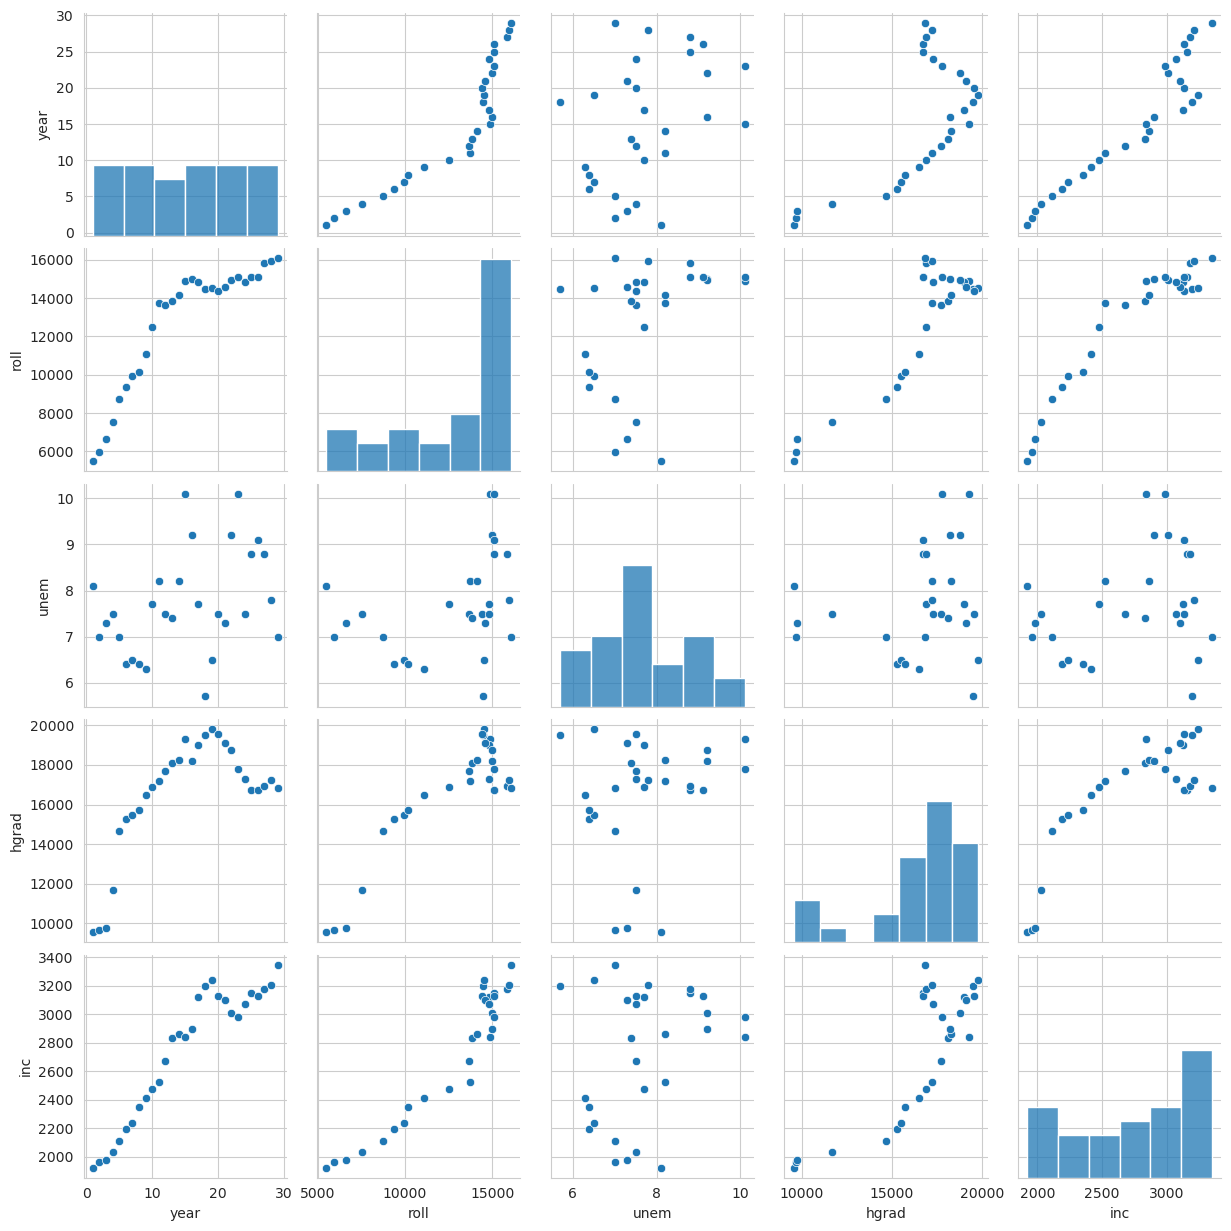

In [244]:
# Check for correlation

sns.pairplot(enroll_df)


In [245]:
# Check the correlation

print (enroll_df.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [246]:
# create subset

enroll_data = enroll_df[['unem', 'hgrad']].values

enroll_target = enroll_df['roll'].values

enroll_data_names = ['unem', 'hgrade']

X,y = scale(enroll_data), enroll_target

In [247]:
# Checking for missing values

missing_values = X == np.NaN
X[missing_values == True]

array([], dtype=float64)

we have empty array which means there is not any missing values

In [248]:
# instantiate linear regrassion object
LinReg = LinearRegression()
LinReg.fit(X, y)
print(LinReg.score(X, y))

0.8488812666133723


max good score would be 0.99 and min score would be 0.01. If you see the value 0 or 1 you should that there is something wrong with your data
***this model has R Squard value of 0.85 which is not bad prediction***

# Logistic regression: Concepts

In [13]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

## Logistic regression on the titanic dataset

This data came from Kaggle (https://www.kaggle.com/c/titanic/data)


In [250]:
url = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/titanic-training-data.csv'

titanic_training_df = pd.read_csv(url)
# assign to columns
titanic_training_df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

print (titanic_training_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [251]:
print (titanic_training_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


***As we see we have missing values in age and Cabin***

Just a quick fyi (we will examine these variables more closely in a minute):

##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

<Axes: xlabel='Survived', ylabel='count'>

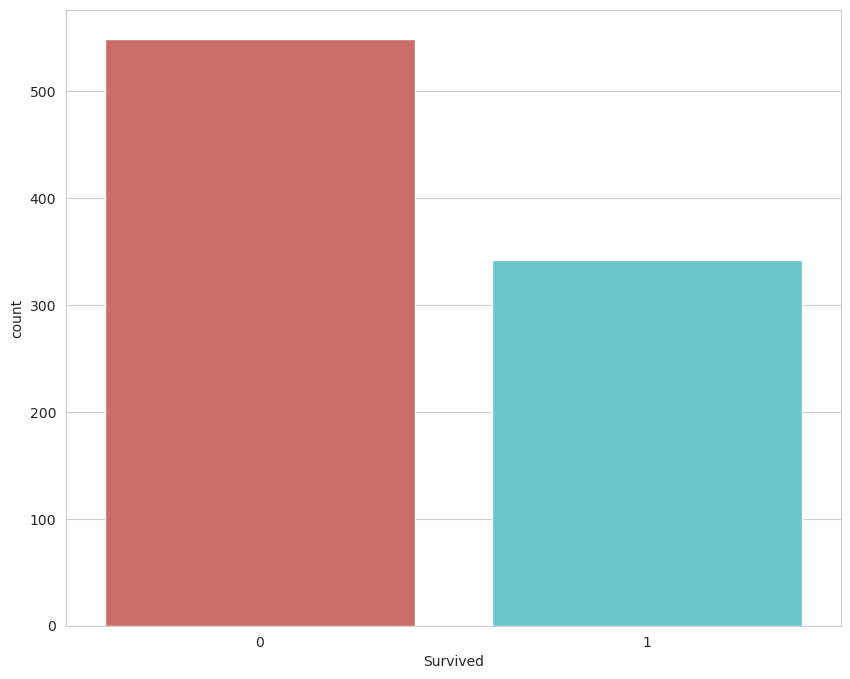

In [252]:
# First we want to check out our target variable is binary

sns.countplot(x='Survived', hue='Survived', data=titanic_training_df, palette='hls', legend=False)

In [253]:
# checking missing values

# is null method
titanic_training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
# Another way to check number of rows in dataset

titanic_training_df.describe()

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [255]:
# Drop variables that are not relevant for predicting 

titanic_data = titanic_training_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

titanic_data.head()

,PassengerId,Survived,Pclass,Sex,age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Parch', ylabel='age'>

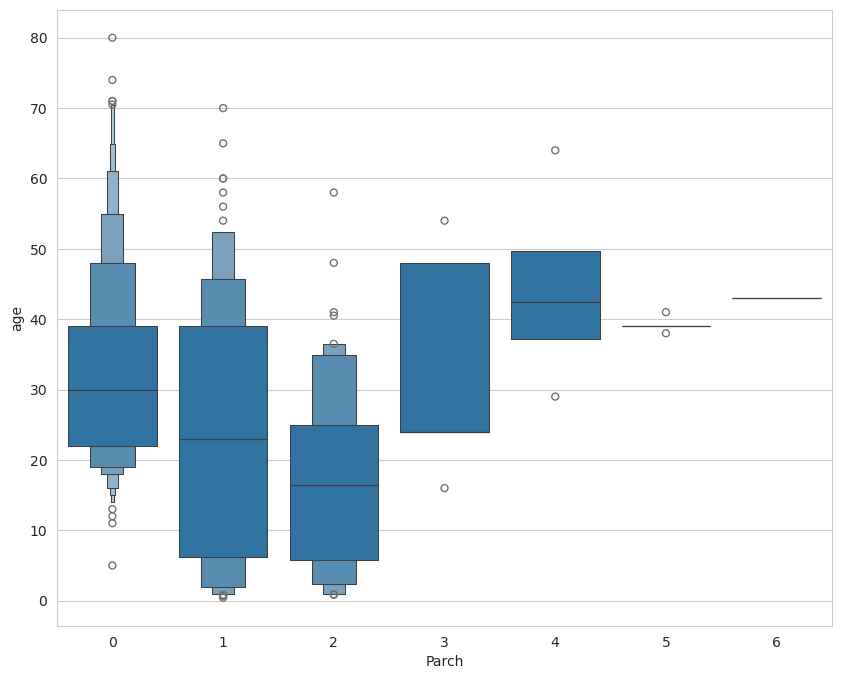

In [256]:
# impute for missing variables
sns.boxenplot(x='Parch', y='age', data=titanic_data)

In [257]:
# find average age pre Parch category

Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean(numeric_only=True)

,PassengerId,Survived,Pclass,age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [258]:
# write a function to impute missing values
def age_approx(cols):
    Age = cols.iloc[0]
    Parch = cols.iloc[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30  # average age value of people on the boat
        
    return Age # is says if there is an age it is not necessary to above process


In [259]:
# apply the function 
titanic_data ['age'] = titanic_data[['age', 'Parch']].apply(age_approx, axis=1)

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [260]:
# drop missing values because we only have 2 missing valuse which dropping them would change our result 

titanic_data.dropna(inplace=True)
# we want to reset our index in order to have accurate index for our output data set
titanic_data.reset_index(inplace=True, drop=True)

print (titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


### Logistic regression: Re-encode variable

In [261]:
# First thing to do is convert categorical variables to dummy indicators

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex'] 
gender_endoded = label_encoder.fit_transform(gender_cat)

gender_endoded[0:5]

array([1, 0, 0, 0, 1])

In [262]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [263]:
# Create gender DataFrame

gender_df = pd.DataFrame(gender_endoded, columns=['male_gendere']) # it helps us to undersand for male or female

gender_df.head()

,male_gendere
0,1
1,0
2,0
3,0
4,1


In [264]:
embarked_cat= titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [265]:
# we need to use one-hot encoding in order to get binary variable 

from sklearn.preprocessing import OneHotEncoder

In [266]:
binary_encoder = OneHotEncoder(categories='auto')
embarked_onehot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1)) # we use reshape method to reshape it as a column.
embarked_onehot_mat = embarked_onehot.toarray() # we want to be a matrix therefore we use toarray() method.
emabrked_df = pd.DataFrame (embarked_onehot_mat, columns=['C', 'Q', 'S']) # transformet to data frame and then we name our columns.
emabrked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [267]:
# drop old emabarked

titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

titanic_data.head()

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [268]:
# concanate our new variables

titanic_dmy = pd.concat([titanic_data, gender_df, emabrked_df], axis=1, verify_integrity=True).astype(float)

titanic_dmy[0:5]

,PassengerId,Survived,Pclass,age,SibSp,Parch,Fare,male_gendere,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


### Logistic regression: Validating dataset

<Axes: >

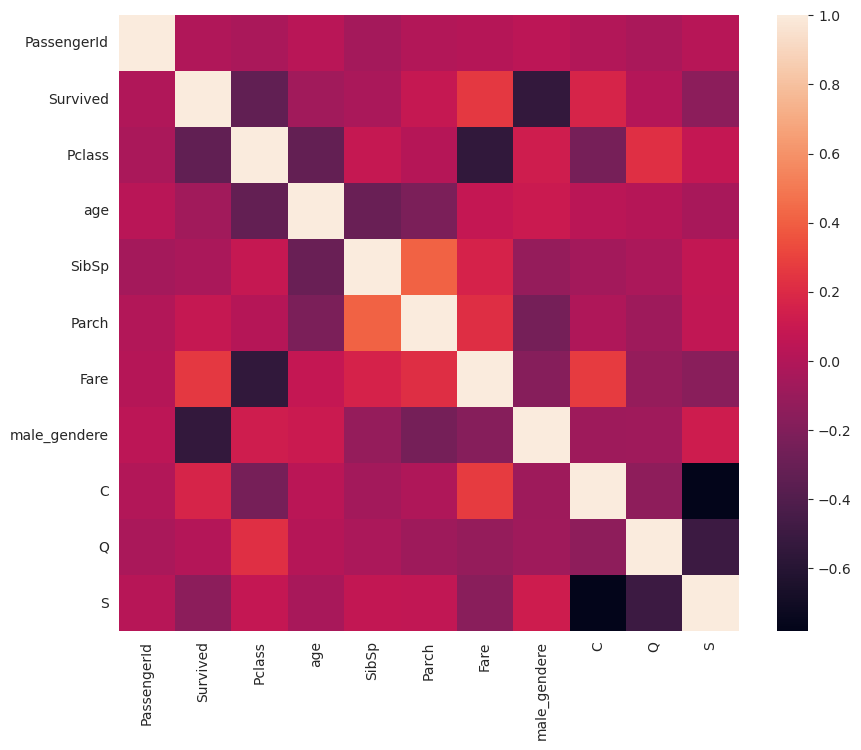

In [269]:
# we start with checking for independence between features

sns.heatmap(titanic_dmy.corr())

If we have correlation that's close to 1 or -1 that mean we have sort of strong linear relation between a variable pair.
In above heatmap we are looking valuse that is very very light or close to wight or very very dark or close to black for example between Pclass and Fare there is a black cube whcih means there are not diffiently independent to one and another.

In [270]:
# Let one of those

titanic_dmy.drop(['Fare'], axis=1, inplace=True)


# The operation modifies the original titanic_dmy DataFrame directly.
# No new DataFrame is returned.
# After this operation, the column Fare is permanently removed from titanic_dmy.

titanic_dmy.head()

,PassengerId,Survived,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


we drop Fare variable because it was not independent

In [271]:
# How many predictor we have

titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    float64
 1   Survived      889 non-null    float64
 2   Pclass        889 non-null    float64
 3   age           889 non-null    float64
 4   SibSp         889 non-null    float64
 5   Parch         889 non-null    float64
 6   male_gendere  889 non-null    float64
 7   C             889 non-null    float64
 8   Q             889 non-null    float64
 9   S             889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


***We should have at leaste 50 recorde per predective feature in order to do Logestic regression***

We have 7 predictor the last actually was a predictor that we seperate in three columns

### Logistic regression: Model deployment

In [272]:
# Break data to training and test sets

X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), #  we don't call "Survived" variable because we want to predict this variable
                                                    titanic_dmy['Survived'], test_size=0.20, # for y varibale we actually want to be "Survived" variable with the size of 20%
                                                    random_state=200 
                                                    ) 

In [273]:
print(X_train.shape) # call the shape method
print(y_train.shape)

(711, 9)
(711,)


In [274]:
X_train[0:5]

,PassengerId,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
719,721.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,3.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,3.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [275]:
# Instantiate Logestic model


LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train.values, y_train.values)


LogisticRegression(solver='liblinear')

In [276]:
# Use model to make prediction
y_pred = LogReg.predict(X_test.values)

### Logistic regression: Model evaluation

In [277]:
# How well our model works
# First classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       109
         1.0       0.84      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [278]:
# K-fold cross-validation and look at confusion metrix

y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[384,  56],
       [ 90, 181]])

it telling us 384 and 181 are the number of correct predictions and 90 and 56 are number incorrect predictions

In [279]:
precision_score(y_train, y_train_pred)

0.7637130801687764

### Logistic regression: Test prediction

In [280]:
titanic_dmy[863:864] # pull up a row in index position 863

,PassengerId,Survived,Pclass,age,SibSp,Parch,male_gendere,C,Q,S
863,866.0,1.0,2.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [281]:
test_passenger = np.array(['866', '2', '40', '0', '0', '0', '0', '0' ,'1']).astype(float).reshape(1, -1) # make small changes in above value that our model predict in other situation

## we need to make sure we have numeric values

print (LogReg.predict(test_passenger))
print (LogReg.predict_proba(test_passenger)) # we want to print out probability 

[1.]
[[0.2459 0.7541]]


 What predict is that our passenger will survived because our passenger in index possition 863 survived as well and the probability of this prediction be correct is 75%

# Cluster analysis with the K-means method

### Setting up for clustering analysis

In [8]:
import sklearn.metrics as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets # pre build dataset

In [283]:
plt.figure(figsize=(7, 4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [284]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names # it access us to just feature names

X[0:10]

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522],
       [-1.5065,  0.7888, -1.3402, -1.1838],
       [-1.0218,  0.7888, -1.2834, -1.3154],
       [-1.7489, -0.3622, -1.3402, -1.3154],
       [-1.143 ,  0.0982, -1.2834, -1.4471]])

## Building and running your model

In [285]:
clustering = KMeans (n_clusters=3, random_state=5) # We want to have only 3 clusters

# Now we have to fit it 

clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Plotting your model outputs


In [286]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns =  ['Sepal_Length', 'Sepal_Width', 'Petal_Length' , 'Petal_Width']
y.columns = ['Targets']


Text(0.5, 1.0, 'K-Means Classification')

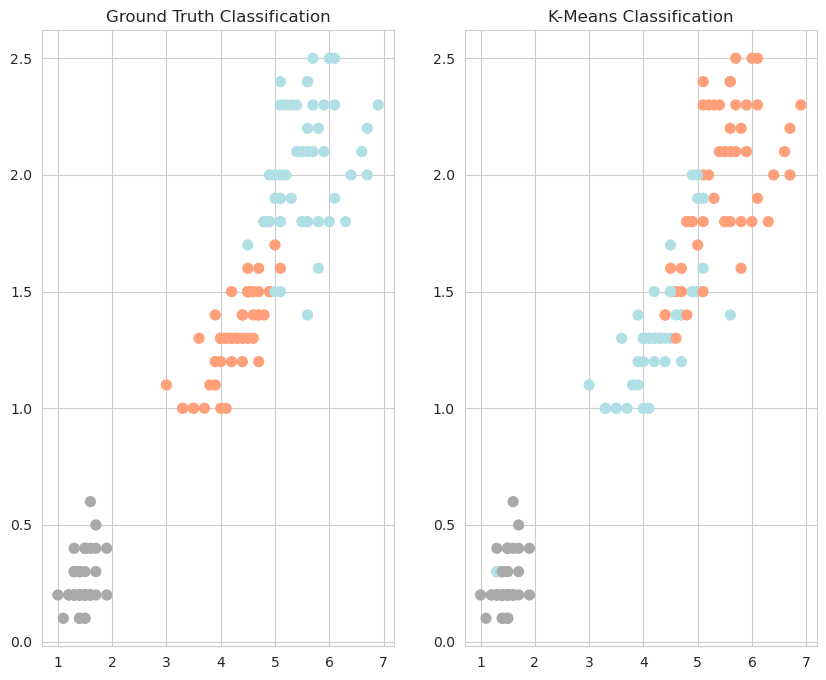

In [287]:
# Create color theme for our scatter chart
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

# for visulization we create a subplot with one row and two columns
plt.subplot(1,2,1)


plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)

# title
plt.title('Ground Truth Classification')

plt.subplot (1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)

# title
plt.title('K-Means Classification')


Text(0.5, 1.0, 'K-Means Classification')

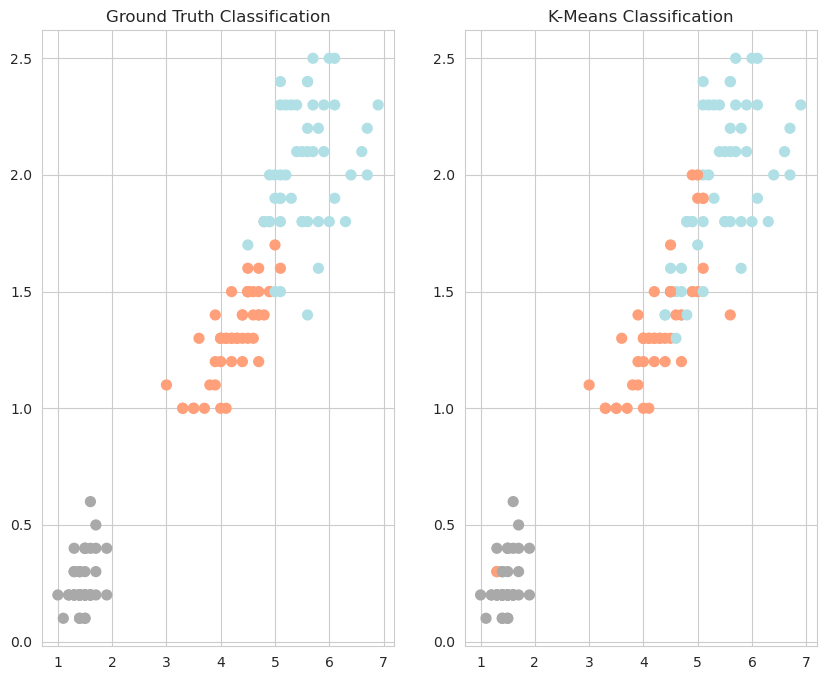

In [288]:
relabel = np.choose (clustering.labels_, [0,2,1]).astype(np.int64) # we wnat to be as integer 64 format

plt.subplot(1,2,1)


plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot (1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

As we K-means cluster did greate job and indentify which data port fall on in what clusters.

## Evaluate your clustering results

In [289]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



### Hierarchical cluster analysis

In [290]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [291]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

In [292]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp' , 'hp', 'wt']].values
y = cars.iloc[:, (9)].values # we onely want gear so use iloc mehod to poining it position

### Using scipy to generate dendrograms

In [293]:
# use linkage method

Z = linkage(X, 'ward')

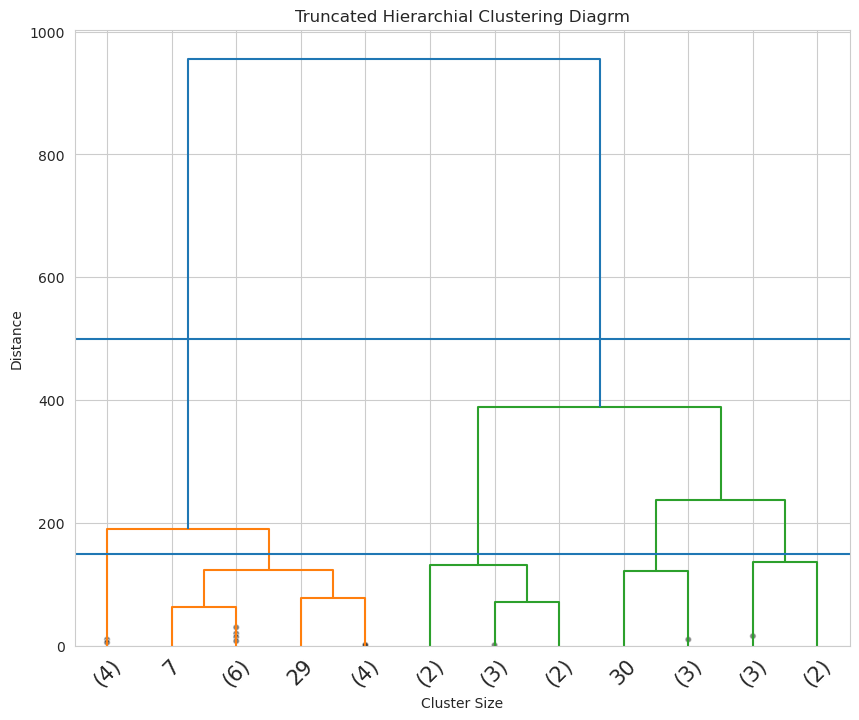

In [294]:
# generate dendrogram

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagrm')
plt.xlabel ('Cluster Size')
plt.ylabel ('Distance')
plt.axhline (y=500)
plt.axhline (y=150)

plt.show()


### Generating hierarchical clusters

In [295]:
k = 2 # because we know we have manual and automate cars

Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward') # ward linkage only works with "euclidean" distance.

Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [296]:
# Trial and Error

Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')

Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [297]:
Hclustering = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')

Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

Two first have same score of performace so we can choose one of them.

# DBSCAN clustering for outlier detection

In [298]:
from sklearn.cluster import DBSCAN

rcParams ['figure.figsize'] =5, 4

### DBSCan clustering to identify outliers
#### Train your model and identify outliers


In [299]:
df = pd.read_csv (filepath_or_buffer='/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/iris.data.csv', header=None, sep=',')

df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Lenght', 'Petal_Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

,Sepal_Length,Sepal_Width,Petal_Lenght,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [300]:
# instantiate the model

model = DBSCAN(eps=0.8, min_samples=19) # it says we want maximum distance between two sample be 0.8 in order to be considered in same neighberhood. 19 says each points must have minimum 19 samples to be considered as core
model.fit(data)

print (model)



DBSCAN(eps=0.8, min_samples=19)


In [301]:
# Identify outliers

outliers_df = pd.DataFrame(data)

# we don't want more than 5% of data points to labeld as outliers
print (Counter(model.labels_))
print (outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Our counter returns how many assigned to a label of 1, 0 and -12
The records with label of -1 consider as outliers 150 total observations 6 with -1 label (4%)



Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

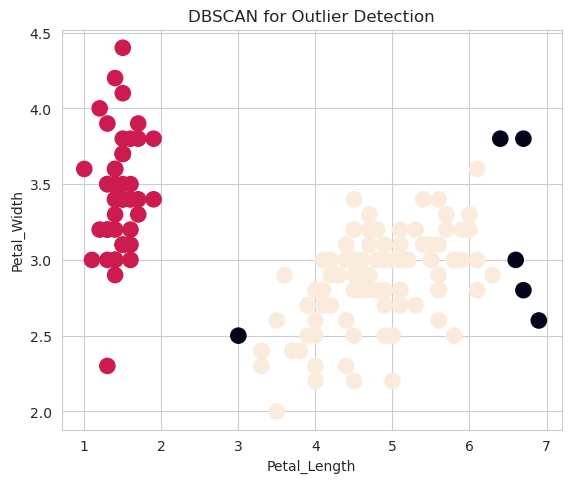

In [302]:
# visualization of our clustering result
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s= 120)

ax.set_xlabel('Petal_Length')
ax.set_ylabel('Petal_Width')
plt.title ('DBSCAN for Outlier Detection')

The black dots called Collective Outliers

# Explanatory factor analysis

In [303]:
from sklearn.decomposition import FactorAnalysis

### Factor analysis on iris dataset

We're going to be using the built-in iris dataset from scikit-learn, so that's all set up for you. Our variable X is going to be iris data, and then we also have the variable names which we take from the built-in dataset.

In [304]:
iris = datasets.load_iris()

X = iris.data

variable_names = iris.feature_names

In [305]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [306]:
# Instantiate factor analysis
factor = FactorAnalysis().fit(X)

df = pd.DataFrame(factor.components_, columns=variable_names)

print(df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


 Factor one has high factor loadings for sepal length, petal length, and petal width. In other words, factor one is highly influential on the sepal length, petal length, and petal width of irises. Factor two has no high loadings on any of the variables here. Because of that, you can't interpret much and you should drop the factor throughout the remainder of your evaluation. Next, we'll look at principle component analysis.

### Principal component analysis (PCA)

In [307]:
from IPython.display import Image
from IPython.core.display import HTML 

from sklearn import decomposition
from sklearn.decomposition import PCA

In [308]:
pca = decomposition.PCA()
iria_pca = pca.fit_transform(X)
pca.explained_variance_ratio_


array([0.9246, 0.0531, 0.0171, 0.0052])

It tells us show much information is compressed into the first few components

Look at the explained variance ratio. We see that the first component explained 92.5% of the dataset's variance. That means that it holds 92.5% of the data's information in one principal component. That's the junk we want to get rid of anyway.

In [309]:
pca.explained_variance_ratio_.sum()

1.0

 From our analysis, when we sum up the variance that's explained by all of the components, it adds up to one. This is our cumulative variance. This means that 100% of the dataset's information is captured in the four components that were returned.

When deciding how many components to keep, look at the percet of cumulative variance. Make sure to retain at least 70% of the dataset's original information.

In [310]:
comps = pd.DataFrame (pca.components_, columns=variable_names)

comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<Axes: >

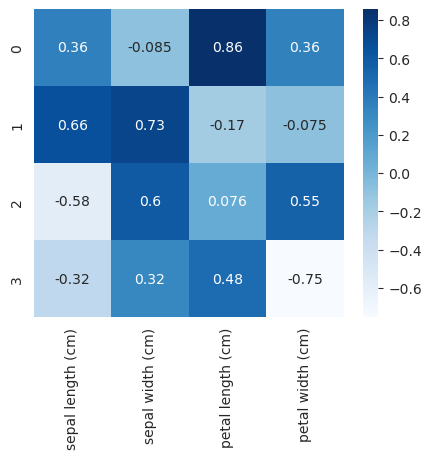

In [311]:
# heat map to see how data correlated with components

sns.heatmap(comps, cmap='Blues', annot=True) # annot gives lable to data

Based on that information, we decided to keep only those two components. The results from my correlation heatmap show that one principal component is strongly positively correlated with petal length and moderately positively correlated with sepal length and petal width. Component one is slightly negatively correlated with sepal width. And principal component number two is strongly negatively correlated with sepal length and sepal width, and slightly negatively correlated with petal length and petal width.

# Association rules models with the Apriori algorithm

In [312]:
pip install mlxtend

/home/micheal/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=116078) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [313]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [314]:
# transaction data needs to be in sparse format for association rule
data = pd.read_csv('/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/groceries.csv')

data.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


In [315]:
# convert data to sparse format

baskets_set = data.stack().str.get_dummies().groupby(level=0).sum() # use dummies method

In [316]:
baskets_set.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [317]:
# find product with minimum support
# change basket_set to boolen type

baskets_set_bool = baskets_set.astype(bool)
apriori(baskets_set_bool, min_support=0.02)  

,support,itemsets
0,0.028155,(1)
1,0.054369,(8)
2,0.032039,(9)
3,0.027508,(10)
4,0.072492,(11)
...,...,...
105,0.022977,"(154, 163)"
106,0.033981,"(162, 158)"
107,0.055987,"(162, 163)"
108,0.022977,"(121, 162, 101)"


110 items with the support of 0.02 above

In [318]:
# what is the name of these items

baskets_set_bool = baskets_set.astype(bool)
apriori(baskets_set_bool, min_support=0.02, use_colnames=True)  

,support,itemsets
0,0.028155,(UHT-milk)
1,0.054369,(beef)
2,0.032039,(berries)
3,0.027508,(beverages)
4,0.072492,(bottled beer)
...,...,...
105,0.022977,"(yogurt, tropical fruit)"
106,0.033981,"(whole milk, whipped/sour cream)"
107,0.055987,"(whole milk, yogurt)"
108,0.022977,"(whole milk, root vegetables, other vegetables)"


we can see popular items at top of the list and not combination of items

In [319]:
# Decrease

df_combo = baskets_set.astype(bool)


# create an object
frequent_itemsets = apriori(df_combo, min_support=0.002, use_colnames=True)

# Also add a length column to describe the number of items in the itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

#The expression apply(lambda x: len(x)) is commonly used in pandas to apply a function to each element of a column (or a DataFrame) and calculate the length of each value.

frequent_itemsets

,support,itemsets,length
0,0.007120,(Instant food products),1
1,0.028155,(UHT-milk),1
2,0.002913,(abrasive cleaner),1
3,0.003560,(artif. sweetener),1
4,0.014887,(baking powder),1
...,...,...,...
2313,0.002265,"(root vegetables, yogurt, other vegetables, wh...",5
2314,0.002589,"(yogurt, other vegetables, whole milk, whipped...",5
2315,0.002265,"(yogurt, other vegetables, whole milk, pip fru...",5
2316,0.002265,"(root vegetables, tropical fruit, yogurt, othe...",5


In [320]:
# filter out one item purchases

frequent_itemsets[(frequent_itemsets['length']>=3)]

,support,itemsets,length
1260,0.002589,"(other vegetables, UHT-milk, bottled water)",3
1261,0.002265,"(UHT-milk, bottled water, soda)",3
1262,0.002589,"(whole milk, baking powder, other vegetables)",3
1263,0.002265,"(whole milk, baking powder, whipped/sour cream)",3
1264,0.002589,"(whole milk, beef, berries)",3
...,...,...,...
2313,0.002265,"(root vegetables, yogurt, other vegetables, wh...",5
2314,0.002589,"(yogurt, other vegetables, whole milk, whipped...",5
2315,0.002265,"(yogurt, other vegetables, whole milk, pip fru...",5
2316,0.002265,"(root vegetables, tropical fruit, yogurt, othe...",5


These are popular combinations

In [321]:
# rules with confidence level


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9,num_itemsets=0)

rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(hamburger meat, curd)",(whole milk),0.003236,0.256634,0.003236,1.000000,3.896595,1.0,0.002406,inf,0.745779,0.012610,1.000000,0.506305
1,"(root vegetables, frozen fish)",(whole milk),0.002265,0.256634,0.002265,1.000000,3.896595,1.0,0.001684,inf,0.745054,0.008827,1.000000,0.504414
2,"(sausage, bottled water, yogurt)",(soda),0.003560,0.159223,0.003236,0.909091,5.709534,1.0,0.002669,9.248544,0.827801,0.020284,0.891875,0.464708
3,"(sausage, bottled water, soda)",(yogurt),0.003560,0.136893,0.003236,0.909091,6.640877,1.0,0.002749,9.494175,0.852452,0.023585,0.894672,0.466366
4,"(whole milk, pip fruit, butter)",(other vegetables),0.003560,0.192557,0.003236,0.909091,4.721161,1.0,0.002551,8.881877,0.791004,0.016779,0.887411,0.462949


In [322]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=0)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(Instant food products),0.192557,0.007120,0.002265,0.011765,1.652406,1.0,0.000894,1.004700,0.488978,0.011475,0.004678,0.164973
1,(Instant food products),(other vegetables),0.007120,0.192557,0.002265,0.318182,1.652406,1.0,0.000894,1.184250,0.397653,0.011475,0.155584,0.164973
2,(Instant food products),(root vegetables),0.007120,0.110032,0.002265,0.318182,2.891711,1.0,0.001482,1.305286,0.658875,0.019718,0.233884,0.169385
3,(root vegetables),(Instant food products),0.110032,0.007120,0.002265,0.020588,2.891711,1.0,0.001482,1.013752,0.735065,0.019718,0.013565,0.169385
4,(UHT-milk),(bottled water),0.028155,0.111974,0.006472,0.229885,2.053020,1.0,0.003320,1.153108,0.527772,0.048426,0.132779,0.143844


In [323]:
# outputs

rules[(rules['lift']>=5) & (rules['confidence']>= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7110,"(sausage, bottled water, yogurt)",(soda),0.003560,0.159223,0.003236,0.909091,5.709534,1.0,0.002669,9.248544,0.827801,0.020284,0.891875,0.464708
7111,"(sausage, bottled water, soda)",(yogurt),0.003560,0.136893,0.003236,0.909091,6.640877,1.0,0.002749,9.494175,0.852452,0.023585,0.894672,0.466366
7379,"(rolls/buns, sausage, canned beer)",(shopping bags),0.002589,0.082848,0.002265,0.875000,10.561523,1.0,0.002051,7.337217,0.907667,0.027237,0.863709,0.451172
8130,"(other vegetables, dessert, whipped/sour cream)",(yogurt),0.002913,0.136893,0.002589,0.888889,6.493302,1.0,0.002190,7.767961,0.848466,0.018868,0.871266,0.453901
8188,"(pastry, other vegetables, frankfurter)",(rolls/buns),0.002265,0.194498,0.002265,1.000000,5.141431,1.0,0.001825,inf,0.807331,0.011647,1.000000,0.505824
8313,"(whole milk, hamburger meat, pork)",(other vegetables),0.002589,0.192557,0.002589,1.000000,5.193277,1.0,0.002090,inf,0.809539,0.013445,1.000000,0.506723


### Instance-based learning with KNN Classification

In [324]:
import urllib

In [325]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [326]:
np.set_printoptions (precision=4, suppress=True)
rcParams ['figure.figsize'] = 7, 4

In [327]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


In [328]:
# create dataframe

x_prime = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,9].values

In [329]:
#assumption 
x = preprocessing.scale(x_prime)

In [330]:
# split data
x_train,x_test , y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [331]:
#build our model first instantiate 
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [332]:
# Evaluate its preformance

y_pred = clf.predict(x_test)

y_expect = y_test

# use classifire report function to see preformance
print (metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



What these results are saying is that of all the points that were labeled one only 67 percent of those results were truly relevant, and of the entire data set, 82 percent of the results that were returned were truly relevant.

### Naive Bayes Classifiers

In [344]:
from  sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

import urllib.request

from sklearn.metrics import accuracy_score



In [334]:
# The spam dataset comes from University of California Irvine. 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# import our data
raw_data = urllib.request.urlopen(url)

dataset = np.loadtxt(raw_data, delimiter=',')

print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [340]:
# isolate predictive variables

# Predictive dataset X

X = dataset[:,0:48]

#target
y = dataset[:,-1]

In [336]:
# split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=17)

In [345]:
BernNB = BernoulliNB (binarize=True)

BernNB.fit(x_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8577633007600435


In [346]:
MultiNB = MultinomialNB ()

MultiNB.fit(x_train, y_train)

y_expect = y_test
y_pred = MultiNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8816503800217155


In [347]:
GausNB = GaussianNB ()

GausNB.fit(x_train, y_train)

y_expect = y_test
y_pred = GausNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8197611292073833


In [349]:
# impove by trial and error
# binarize parameter change can improve it

BernNB = BernoulliNB (binarize=0.1)

BernNB.fit(x_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))


0.9109663409337676


## Ensemble methods with random forest

This is a classification problem, where in we will be estimating the species label for iris flowers.

In [351]:
from sklearn.ensemble import RandomForestClassifier

In [350]:

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

In [352]:
# change name of columns

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:
- sepal length (cm)
- sepal width (cm)  
- petal length (cm)  
- petal width (cm)
- species type

In [353]:
# make sure we don't have any null value use null method

df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [ ]:
# how many folowers are in each class use values counts method

print (y.labels.value_counts())

labels
0    50
1    50
2    50
Name: count, dtype: int64


In [356]:
# split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=17)



In [357]:
classifire = RandomForestClassifier(n_estimators=200, random_state=0)
# reformat our data
y_train_array = np.ravel(y_train)
classifire.fit(X_train, y_train_array)
y_pred = classifire.predict(X_test)

In [358]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [359]:
# visulization

y_test_array = np.ravel(y_test)
print (y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [361]:
print  (y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]


it has miss classification

# Neural Network with a Perceptron

In [2]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import Perceptron

In [10]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

x[0:10]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [17]:
x_train, x_test,  y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=17)

In [18]:
# Normalization

standardize = StandardScaler()

standardized_x_test = standardize.fit_transform(x_test)

standardized_x_train = standardize.fit_transform(x_train)

In [19]:
standardized_x_test[0:10]

array([[-0.64325669,  2.16518556, -1.74844564, -1.31220275],
       [ 0.26132303, -0.34275138,  0.28118896,  0.20187735],
       [ 1.31666604, -0.09195769,  0.72517153,  1.30302651],
       [-0.19096683, -0.59354508,  0.02748464, -0.07340994],
       [ 0.5628496 , -0.59354508,  0.4714672 ,  0.61480828],
       [ 0.41208632, -0.09195769,  0.53489328,  0.61480828],
       [-0.64325669, -0.09195769,  0.28118896,  0.20187735],
       [ 2.82429891,  1.91439187,  1.67656274,  1.16538286],
       [-0.4924934 , -1.59671985, -0.16279361, -0.34869723],
       [-0.19096683, -1.34592616,  0.59831937,  0.89009557]])

In [22]:
# create preceptron

perceptron = Perceptron (max_iter=50, eta0=0.15, tol=1e-3, random_state=15)

perceptron.fit(standardized_x_train, y_train.ravel()) # use ravel method for y_train beacuse of the format

Perceptron(eta0=0.15, max_iter=50, random_state=15)

In [23]:
y_pred = perceptron.predict (standardized_x_test)

In [26]:
print (y_test)
print (y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]
[0 1 2 1 1 2 0 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 0 0 1 1 0 1]


In [27]:
# classification report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.80      0.73      0.76        11
           2       1.00      0.83      0.91        12

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30



# Introduction to NLP

In [6]:
!pip install nltk
import nltk

In [19]:
text = "On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share."

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/micheal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import nltk
print(nltk.data.path)

['/home/micheal/nltk_data', '/home/micheal/anaconda3/nltk_data', '/home/micheal/anaconda3/share/nltk_data', '/home/micheal/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [21]:
from nltk.tokenize import sent_tokenize
sent_tk = sent_tokenize(text)
print("Sentence tokenizing the text: \n")
print(sent_tk)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/micheal/nltk_data'
    - '/home/micheal/anaconda3/nltk_data'
    - '/home/micheal/anaconda3/share/nltk_data'
    - '/home/micheal/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# Introduction to generative AI